In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv("../data/train_new.csv", dtype={"StateHoliday": str})
store = pd.read_csv("../data/store.csv")

In [3]:
numeric_feats = ['Store', 'Day', 'Month', 'Year', 'WeekOfYear', 'Promo', 'SchoolHoliday', 'CompetitionDistance', \
    'CompetitionAge', 'Promo2Age', 'Promo2' 
]

categorical_feats = [ 'DayOfWeek','StateHoliday', 'StoreType', 'Assortment']

In [5]:
print(len(df))
df.head()

844392


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionAge,Promo2Age,IsPromo2Applied
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,31,31,82.0,0.000000,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.131148,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,51.901639,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,31,31,70.0,0.000000,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,NaN,NaN,NaN,2015,7,31,31,3.0,0.000000,0


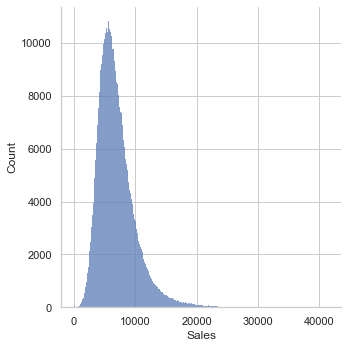

In [5]:
sns.displot(df['Sales'])

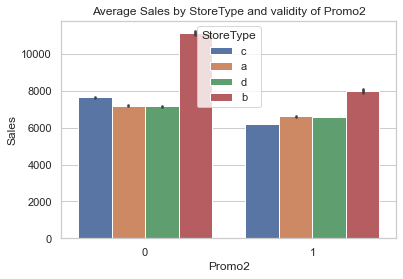

In [54]:
fig = sns.barplot(data=df, x='Promo2', y='Sales', hue='StoreType')
fig.set_title("Average Sales by StoreType and validity of Promo2")
plt.show(fig)

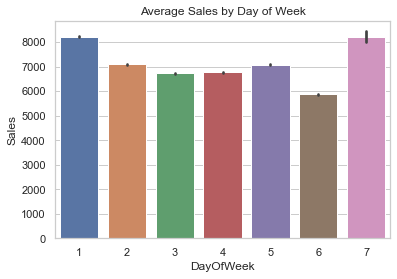

In [26]:
fig = sns.barplot(data=df, x='DayOfWeek', y='Sales')
fig.set_title("Average Sales by Day of Week")
plt.show(fig)

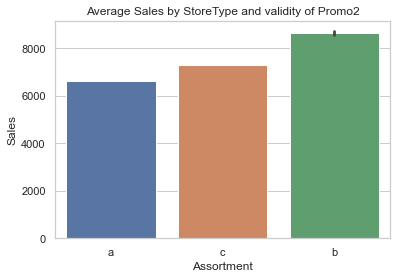

In [4]:
fig = sns.barplot(data=df, x='Assortment', y='Sales')
fig.set_title("Average Sales by StoreType and validity of Promo2")
plt.show(fig)

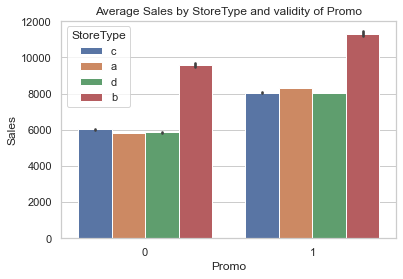

In [7]:
fig = sns.barplot(data=df, x='Promo', y='Sales', hue='StoreType')
fig.set_title("Average Sales by StoreType and validity of Promo")
plt.show(fig)

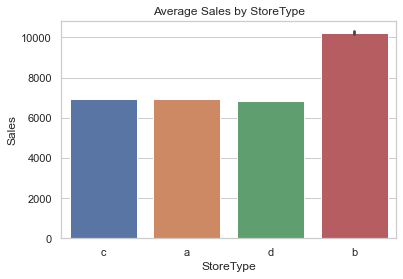

In [8]:
fig = sns.barplot(data=df, x='StoreType', y='Sales')
fig.set_title("Average Sales by StoreType")
plt.show(fig)

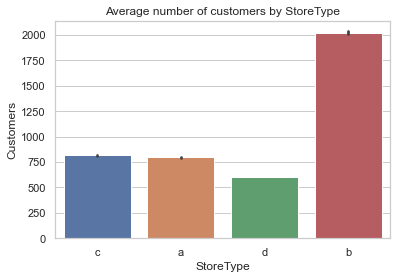

In [9]:
fig = sns.barplot(data=df, x='StoreType', y='Customers')
fig.set_title("Average number of customers by StoreType")
plt.show(fig)

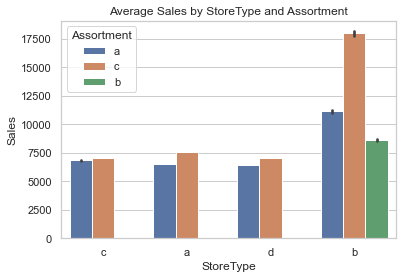

In [10]:
fig = sns.barplot(data=df, x='StoreType', y='Sales', hue="Assortment")
fig.set_title("Average Sales by StoreType and Assortment")
plt.show(fig)

In [14]:
df_comp_age = df.groupby("CompetitionAge", as_index=False).agg({'Sales' : 'median'})
df_comp_age

,CompetitionAge,Sales
0,0.0,6409.0
1,1.0,6299.0
2,2.0,6290.0
3,3.0,6335.0
4,4.0,6460.0
...,...,...
331,1382.0,6008.0
332,1383.0,6593.0
333,1384.0,6524.0
334,1385.0,6005.0


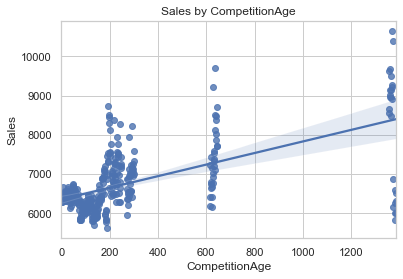

In [16]:
fig = sns.regplot(data=df_comp_age, x='CompetitionAge', y='Sales')
fig.set_title("Sales by CompetitionAge")
plt.show(fig)

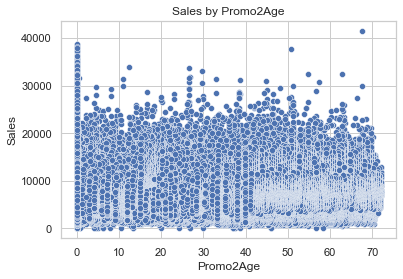

In [12]:
fig = sns.scatterplot(data=df, x='Promo2Age', y='Sales')
fig.set_title("Sales by Promo2Age")
plt.show(fig)

In [20]:
df_comp_dist = df[df['CompetitionDistance'] < 100000].groupby("CompetitionDistance", as_index=False).agg({'Sales' : 'median'})
df_comp_dist

,CompetitionDistance,Sales
0,20.0,5451.0
1,30.0,5357.5
2,40.0,7111.0
3,50.0,8716.0
4,60.0,9004.0
...,...,...
649,45740.0,7616.5
650,46590.0,4410.0
651,48330.0,4554.5
652,58260.0,6176.0


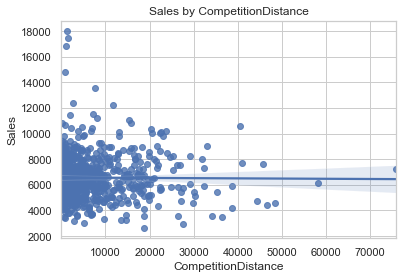

In [23]:
fig = sns.regplot(data=df_comp_dist, x='CompetitionDistance', y='Sales')
fig.set_title("Sales by CompetitionDistance")
plt.show(fig)

In [6]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


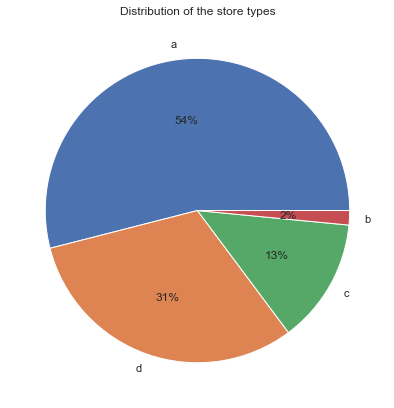

In [51]:
#define data
data=store['StoreType'].value_counts(normalize=True).values.tolist()
labels=store['StoreType'].value_counts(normalize=True).index.tolist()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:4]

#create pie chart
fig1, ax1 = plt.subplots()
fig1.set_size_inches(7,7) 
ax1.pie(data, labels = labels, autopct='%.0f%%')
plt.rc('figure', titlesize=100)
plt.title("Distribution of the store types")
plt.show()

<ipython-input-52-6acf9dac499b>:11: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(data, labels = labels, autopct='%.0f%%')


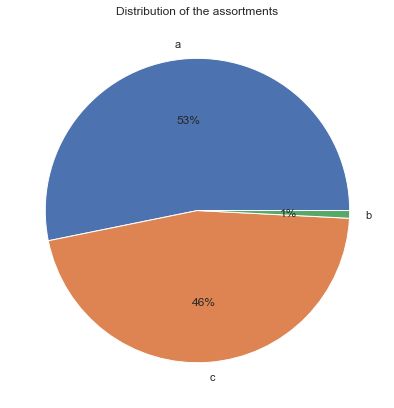

In [52]:
#define data
data=store['Assortment'].value_counts(normalize=True).values.tolist()
labels=store['Assortment'].value_counts(normalize=True).index.tolist()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:4]

#create pie chart
fig1, ax1 = plt.subplots()
fig1.set_size_inches(7, 7) 
ax1.pie(data, labels = labels, autopct='%.0f%%')
plt.rc('figure', titlesize=100)
plt.title("Distribution of the assortments")
plt.show()

In [41]:
df_grouped = df.groupby(['Year', 'Month', 'StoreType'], as_index=False).agg({'Sales': 'mean'})

In [42]:
month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}

def build_monthYear(row):
    row['month_year'] = month2str[row['Month']] + ' ' + str(row['Year'])
    return row

df_grouped = df_grouped.apply(build_monthYear, axis=1)

In [43]:
df_grouped

,Year,Month,StoreType,Sales,month_year
0,2013,1,a,6336.730875,Jan 2013
1,2013,1,b,8609.876827,Jan 2013
2,2013,1,c,6266.337034,Jan 2013
3,2013,1,d,5934.443520,Jan 2013
4,2013,2,a,6499.598793,Feb 2013
...,...,...,...,...,...
119,2015,6,d,7301.880014,Jun 2015
120,2015,7,a,6919.457834,Jul 2015
121,2015,7,b,10874.925996,Jul 2015
122,2015,7,c,6965.050300,Jul 2015


Text(0.5, 1.0, 'Average Sales per month')

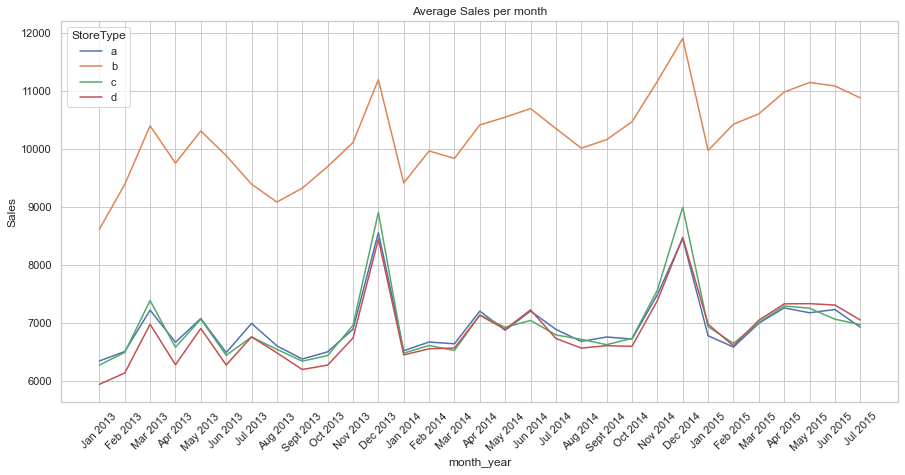

In [50]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_grouped, x='month_year', y='Sales', hue='StoreType')
plt.tick_params(axis='x', labelrotation = 45)
plt.title("Average Sales per month")

0         7
1         7
2         7
3         7
4         7
         ..
844387    1
844388    1
844389    1
844390    1
844391    1
Name: month_name, Length: 844392, dtype: int64